### 计算相关性

In [1]:
library(pacman)
p_load(rgdal,raster,dplyr,export,corrplot,olsrr)

In [4]:
#get the data.frame from shp
getShpValue <- function(file){file@data}
setwd("C:/Users/2019/Desktop/1a/data")
#rgdal::shapefile
landslide <- shapefile("QGIS_Values/landslide_1.shp") %>% getShpValue() 
unlandslide <- shapefile("QGIS_Values//unlandslide_1.shp") %>% getShpValue() 

all_landslide <- rbind(landslide,unlandslide)%>% as.data.frame()



In [5]:
head(all_landslide)

,aspect,elevation,faults,landuse,lithology,loess,NDVI,plan_curva,profile_cu,rainfall,roads,rivers,slope,twi,spi,general_cu,landslides
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,310.91440,1585,778.26733,2,1,1,0.29042,0.56911,0.12466,550,12773.8018,150.00000,13.93471,4.45858,5.31681,0.44444,1
2,284.93143,1800,42.42641,2,1,2,0.27058,0.20915,-0.01307,550,9385.8301,84.85281,7.37131,5.44629,3.88104,0.22222,1
3,231.95296,1792,0.00000,2,1,1,0.38476,0.46097,-0.76126,550,7204.4985,1400.71411,13.67896,5.50746,14.60308,1.22222,1
4,14.30028,1470,2061.28589,2,1,1,0.29355,-0.25559,-0.14448,550,907.9648,891.96411,41.25658,5.14168,131.57697,-0.11111,1
5,342.75854,1378,1590.00000,2,1,1,0.26486,-0.37688,-0.04355,550,284.6050,123.69317,37.20255,5.46856,136.64003,-0.33333,1
6,92.00253,1619,1406.16504,4,1,1,0.42207,0.53249,1.08804,550,2160.0000,1050.00000,30.80329,4.61153,35.77185,-0.55556,1


In [7]:
#变量命名
names(all_landslide)[1:17]<-c('aspect','elevation','faults','landuse','lithology','loess','NDVI',
          'plan_curvature','profile_curvature','rainfall','roads','rivers','slope','twi','spi','general_curvature','landslides')

# all_landslide$Roads[which(is.na(all_landslide$Roads))]<- max(na.omit(all_landslide$Roads))
all_landslide$twi[which(is.na(all_landslide$twi))]<- max(na.omit(all_landslide$twi))


In [8]:
all_landslide$landuse =factor(all_landslide$landuse)
all_landslide$lithology =factor(all_landslide$lithology) 
all_landslide$loess =factor(all_landslide$loess) 

In [9]:
class(all_landslide$landuse)

[1] "factor"

In [10]:
head(all_landslide[,-c(4,5,6,17)])

,aspect,elevation,faults,NDVI,plan_curvature,profile_curvature,rainfall,roads,rivers,slope,twi,spi,general_curvature
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,310.91440,1585,778.26733,0.29042,0.56911,0.12466,550,12773.8018,150.00000,13.93471,4.45858,5.31681,0.44444
2,284.93143,1800,42.42641,0.27058,0.20915,-0.01307,550,9385.8301,84.85281,7.37131,5.44629,3.88104,0.22222
3,231.95296,1792,0.00000,0.38476,0.46097,-0.76126,550,7204.4985,1400.71411,13.67896,5.50746,14.60308,1.22222
4,14.30028,1470,2061.28589,0.29355,-0.25559,-0.14448,550,907.9648,891.96411,41.25658,5.14168,131.57697,-0.11111
5,342.75854,1378,1590.00000,0.26486,-0.37688,-0.04355,550,284.6050,123.69317,37.20255,5.46856,136.64003,-0.33333
6,92.00253,1619,1406.16504,0.42207,0.53249,1.08804,550,2160.0000,1050.00000,30.80329,4.61153,35.77185,-0.55556


Exported graph as corrPlot_pre.pdf

Exported graph as corrPlot.pptx



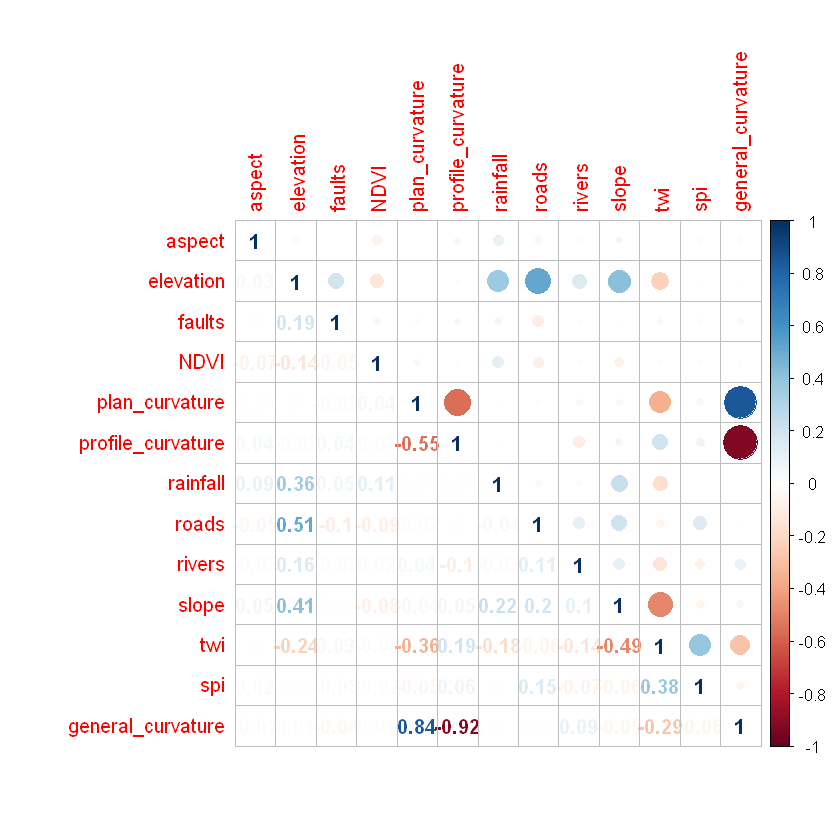

In [12]:
#计算因子之间的相关性
round(cor(all_landslide[, -c(4,5,6,17)]),2)%>%corrplot.mixed(tl.pos = "lt", diag = "l")
graph2pdf(file="corrPlot_pre", aspectr=2, font = "Times New Roman",width=15,height = 15, bg = "white")
graph2ppt(file="corrPlot.pptx", margins=0, upscale=TRUE, append=TRUE)

Exported graph as corrPlot_pre.pdf

Exported graph as corrPlot.pptx



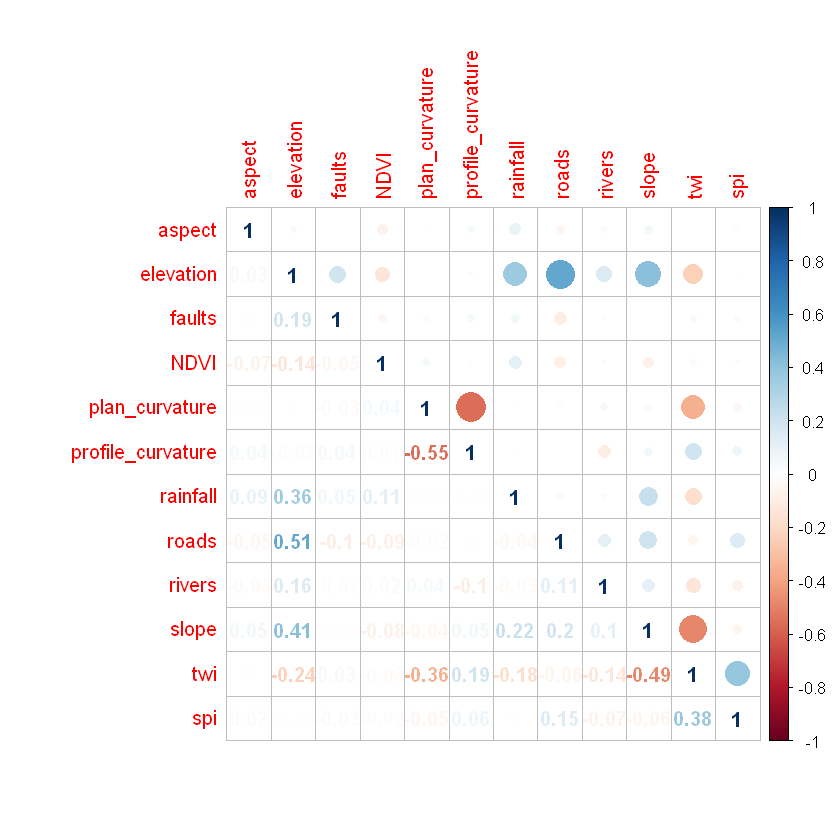

In [22]:
round(cor(all_landslide[, -c(4,5,6,16,17)]),2)%>%corrplot.mixed(tl.pos = "lt", diag = "l")
graph2pdf(file="corrPlot_pre", aspectr=2, font = "Times New Roman",width=15,height = 15, bg = "white")
graph2ppt(file="corrPlot.pptx", margins=0, upscale=TRUE, append=TRUE)

### 计算VIF和TOL

In [13]:
#VIF检验，均小于5.根据VIF经验法则，不存在共线性
library(car)
full.fit<- glm(landslides~.,family = binomial,data=all_landslide)
vif(full.fit)

Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode




,GVIF,Df,GVIF^(1/(2*Df))
aspect,1.074107e+00,1,1.036391e+00
elevation,2.803479e+00,1,1.674359e+00
faults,1.115108e+00,1,1.055987e+00
landuse,2.148214e+00,4,1.100296e+00
lithology,1.971755e+00,4,1.088571e+00
loess,1.383856e+00,1,1.176374e+00
NDVI,1.523487e+00,1,1.234296e+00
plan_curvature,1.471962e+10,1,1.213245e+05
profile_curvature,2.568830e+10,1,1.602757e+05
rainfall,1.597652e+00,1,1.263983e+00


In [16]:
set.seed(1)
library(sampling)
nLevel <- round(nrow(all_landslide)*0.7/2)
#以Type(X0,X1)变量为分层变量，分层抽取训练样本，每层nPerLevel
sub_train = strata(all_landslide,stratanames = "landslides",size=rep(nLevel,2),method = "srswor")
train = all_landslide[sub_train$ID_unit,]
test = all_landslide[-sub_train$ID_unit,]
table(train$landslides)
table(test$landslides)


  0   1 
358 358 


  0   1 
154 154 

In [17]:
#VIF检验，均小于5.根据VIF经验法则，不存在共线性
library(car)
full.fit<- glm(landslides~.,family = binomial,data=train)
vif(full.fit)

,GVIF,Df,GVIF^(1/(2*Df))
aspect,1.115122e+00,1,1.055993e+00
elevation,2.852750e+00,1,1.689009e+00
faults,1.125122e+00,1,1.060718e+00
landuse,2.331812e+00,4,1.111634e+00
lithology,2.146784e+00,4,1.100205e+00
loess,1.420904e+00,1,1.192017e+00
NDVI,1.612112e+00,1,1.269690e+00
plan_curvature,1.422928e+10,1,1.192865e+05
profile_curvature,2.593099e+10,1,1.610310e+05
rainfall,1.657505e+00,1,1.287441e+00


In [20]:
#VIF检验，均小于5.根据VIF经验法则，不存在共线性
library(car)
full.fit<- glm(landslides~.,family = binomial,data=train[,-c(16)])
vif(full.fit)

,GVIF,Df,GVIF^(1/(2*Df))
aspect,1.112509,1,1.054755
elevation,2.846088,1,1.687035
faults,1.125219,1,1.060763
landuse,2.320067,4,1.110932
lithology,2.117505,4,1.098318
loess,1.416393,1,1.190123
NDVI,1.608808,1,1.268388
plan_curvature,1.890324,1,1.374891
profile_curvature,1.475718,1,1.214791
rainfall,1.648370,1,1.283889
